In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.gridspec as gridspec

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.cluster import OPTICS, cluster_optics_dbscan

In [2]:
incidents = pd.read_csv("../incident_data/yearly_incident_data/all_incidents.csv")
incident = incidents.dropna(axis='columns', how='all')
incidents = incidents.dropna()
incidents.head()

C:\Users\gjete\Anaconda3\envs\PythonAdv\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,publicAddress,caseNumber,precinct,offense,description,ucrCode,lat,lon,neighborhood,incidentDate,incidentTime
0,0056Xx Lyndale Av S,MP2010000051,5,CSCR,Crim Sex Cond-Rape,3.0,44.900291,-93.288239,Windom,2010/01/01,00:30
1,0001Xx 62 St W,MP2010000099,5,ROBPAG,Robbery Per Agg,4.0,44.890636,-93.280041,Windom,2010/01/01,01:05
2,0039Xx 5 Av S,MP2010000373,3,BURGD,Burglary Of Dwelling,6.0,44.931448,-93.268841,Bryant,2010/01/01,04:18
3,0013Xx Nicollet Av S,MP2010000305,1,ASLT2,Asslt W/Dngrs Weapon,5.0,44.970506,-93.277714,Loring Park,2010/01/01,03:00
4,0034Xx Oliver Av N,MP2010000229,4,BURGD,Burglary Of Dwelling,6.0,45.017746,-93.306988,Folwell,2010/01/01,02:23


In [3]:
# Get one hot encoding of columns 'vehicleType'
one_hot = pd.get_dummies(incidents['offense'])
# Drop column as it is now encoded
incidents = incidents.drop(['offense'],axis = 1)
# Join the encoded df
incidents = incidents.join(one_hot)
incidents

,publicAddress,caseNumber,precinct,description,ucrCode,lat,lon,neighborhood,incidentDate,incidentTime,...,TFMV,TFMV,TFPER,TFPER,THEFT,THEFT,THFTSW,THFTSW,TMVP,TMVP
0,0056Xx Lyndale Av S,MP2010000051,5,Crim Sex Cond-Rape,3.0,44.900291,-93.288239,Windom,2010/01/01,00:30,...,0,0,0,0,0,0,0,0,0,0
1,0001Xx 62 St W,MP2010000099,5,Robbery Per Agg,4.0,44.890636,-93.280041,Windom,2010/01/01,01:05,...,0,0,0,0,0,0,0,0,0,0
2,0039Xx 5 Av S,MP2010000373,3,Burglary Of Dwelling,6.0,44.931448,-93.268841,Bryant,2010/01/01,04:18,...,0,0,0,0,0,0,0,0,0,0
3,0013Xx Nicollet Av S,MP2010000305,1,Asslt W/Dngrs Weapon,5.0,44.970506,-93.277714,Loring Park,2010/01/01,03:00,...,0,0,0,0,0,0,0,0,0,0
4,0034Xx Oliver Av N,MP2010000229,4,Burglary Of Dwelling,6.0,45.017746,-93.306988,Folwell,2010/01/01,02:23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235545,00008X 8Th St S,MP2020708915,1,Shoplifting,7.0,44.975633,-93.272376,Downtown West,2020/12/24,14:45,...,0,0,0,0,0,0,0,0,0,0
235546,00008X 8Th St S,MP2020708916,1,Shoplifting,7.0,44.975633,-93.272376,Downtown West,2020/12/24,15:45,...,0,0,0,0,0,0,0,0,0,0
235547,0006Xx Washington Ave Se,MP2020708917,2,Bike Theft,7.0,44.973658,-93.229494,University Of Minnesota,2020/12/22,11:00,...,0,0,0,0,0,0,0,0,0,0
235548,0025Xx 36Th Ave N,MP2020321240,4,Theft By Swindle,7.0,45.020468,-93.312715,Cleveland,2020/12/27,17:00,...,0,0,0,0,0,0,0,1,0,0


In [4]:
X= incidents.drop(['publicAddress', 
                   'caseNumber', 
                   'precinct', 
                   'description', 
                   'ucrCode', 
                   'neighborhood',
                   'incidentDate', 
                   'incidentTime'], 
                  axis=1)

y = incidents.drop(['lat','lon'], axis=1)


In [5]:
# This split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [76]:
# cluster_data = incidents.drop(['offense','publicAddress', 'caseNumber', 'precinct', 'description', 'ucrCode', 'neighborhood', 'incidentDate', 'incidentTime'], axis=1)
# cluster_data


In [ ]:
from sklearn.preprocessing import StandardScaler
X_train_scaler = StandardScaler().fit(X_train)
X_test_scaler = StandardScaler().fit(X_test)
# y_scaler = StandardScaler().fit(y)


X_train_scaled = X_train_scaler.transform(X_train)
X_test_scaled = X_test_scaler.transform(X_test)
X_train_scaled

X_train_scaled = pd.DataFrame(X_train_scaled)

X_train_scaled.columns = X_train.columns

X_train_scaled.head()

In [ ]:
from sklearn.cluster import OPTICS
import numpy as np
import matplotlib.pyplot as plt

# Compute OPTICS
# db = OPTICS(max_eps=np.inf, min_samples=50, cluster_method='xi', metric='minkowski').fit(X_train_scaled)

db = OPTICS(min_samples=1000).fit(X_train_scaled)

labels = db.labels_
db = OPTICS(max_eps=np.inf, min_samples=50, cluster_method='xi', metric='minkowski').fit(X_train_scaled)
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)



In [ ]:
#Source is:  https://www.geeksforgeeks.org/ml-optics-clustering-implementing-using-sklearn/

# Producing the labels according to the DBSCAN technique with eps = 0.5 
labels1 = cluster_optics_dbscan(reachability = db.reachability_, 
                                   core_distances = db.core_distances_, 
                                   ordering = bd.ordering_, eps = 0.5) 
  
# Producing the labels according to the DBSCAN technique with eps = 2.0 
labels2 = cluster_optics_dbscan(reachability = db.reachability_, 
                                   core_distances = db.core_distances_, 
                                   ordering = db.ordering_, eps = 2) 
  
# Creating a numpy array with numbers at equal spaces till 
# the specified range 
space = np.arange(len(X_train_scaled)) 
  
# Storing the reachability distance of each point 
reachability = db.reachability_[db.ordering_] 
  
# Storing the cluster labels of each point 
labels = db.labels_db.ordering_] 
  
print(labels) 

In [ ]:
# Defining the framework of the visualization 
plt.figure(figsize =(10, 7)) 
G = gridspec.GridSpec(2, 3) 
ax1 = plt.subplot(G[0, :]) 
ax2 = plt.subplot(G[1, 0]) 
ax3 = plt.subplot(G[1, 1]) 
ax4 = plt.subplot(G[1, 2]) 
  
# Plotting the Reachability-Distance Plot 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = space[labels == Class] 
    Rk = reachability[labels == Class] 
    ax1.plot(Xk, Rk, colour, alpha = 0.3) 
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3) 
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5) 
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5) 
ax1.set_ylabel('Reachability Distance') 
ax1.set_title('Reachability Plot') 
  


In [ ]:
# Plotting the OPTICS Clustering  
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = X_train_scaled[db.labels_ == Class] 
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
      
ax2.plot(X_train_scaled.iloc[db.labels_ == -1, 0], 
        X_train_scaled.iloc[db.labels_ == -1, 1], 
       'k+', alpha = 0.1) 
ax2.set_title('OPTICS Clustering') 
  
# Plotting the DBSCAN Clustering with eps = 0.5 
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow'] 
for Class, colour in zip(range(0, 6), colors): 
    Xk = X_train_scaled[labels1 == Class] 
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.') 
        
ax3.plot(X_train_scaled.iloc[labels1 == -1, 0], 
        X_train_scaled.iloc[labels1 == -1, 1], 
       'k+', alpha = 0.1) 
ax3.set_title('DBSCAN clustering with eps = 0.5') 
  
# Plotting the DBSCAN Clustering with eps = 2.0 
colors = ['c.', 'y.', 'm.', 'g.'] 
for Class, colour in zip(range(0, 4), colors): 
    Xk = X_train_scaled.iloc[labels2 == Class] 
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
          
ax4.plot(X_train_scaled.iloc[labels2 == -1, 0], 
        X_train_scaled.iloc[labels2 == -1, 1], 
       'k+', alpha = 0.1) 
ax4.set_title('DBSCAN Clustering with eps = 2.0') 
  
  
plt.tight_layout() 
plt.show()

In [98]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X_train)

PCA(n_components=5)

In [99]:
X_train['PC1'] = pca.fit_transform(X_train)
X_train['PC2'] = pca.fit_transform(X_train)
X_train['no_clusters'] = db.labels_

C:\Users\gjete\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gjete\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\gjete\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

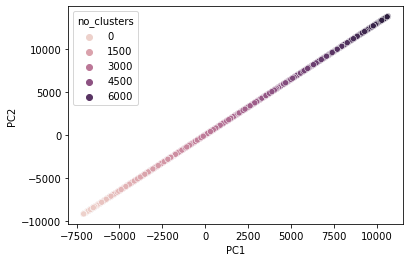

In [100]:
sns.scatterplot(data=X_train,x="PC1",y="PC2",hue=X_train['no_clusters'])

In [74]:
# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title(f'OPTICS clustering')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [32]:
labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=0.5)
labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=2)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

# plt.figure(figsize=(10, 7))
# G = gridspec.GridSpec(2, 3)
# ax1 = plt.subplot(G[0, :])
# ax2 = plt.subplot(G[1, 0])
# ax3 = plt.subplot(G[1, 1])
# ax4 = plt.subplot(G[1, 2])



AttributeError: 'OPTICS' object has no attribute 'reachability_'